In [1]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#modules for opening the data
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import src

#Retrieving postgres info
from src.data import local
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"

In [2]:
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)

In [3]:
SKC_youth_2014 = src.get_SKC_youth_2014(conn)
SKC_youth_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma10                              2081 non-null   object 
 1   rtrim                               2081 non-null   object 
 2   agep                                2081 non-null   float64
 3   gender                              2081 non-null   object 
 4   race_or_ethnicity                   2081 non-null   object 
 5   school                              2081 non-null   object 
 6   education_attainment                2081 non-null   object 
 7   employment_status                   2081 non-null   object 
 8   disability_status                   2081 non-null   object 
 9   disability_type                     2081 non-null   object 
 10  citizenship                         2081 non-null   object 
 11  english_language                    2081 no

In [4]:
SKC_youth_2017 = src.get_SKC_youth_2017(conn)
SKC_youth_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                3482 non-null   object 
 1   rtrim                               3482 non-null   object 
 2   agep                                3482 non-null   float64
 3   gender                              3482 non-null   object 
 4   race_or_ethnicity                   3482 non-null   object 
 5   school                              3482 non-null   object 
 6   education_attainment                3482 non-null   object 
 7   employment_status                   3482 non-null   object 
 8   disability_status                   3482 non-null   object 
 9   disability_type                     3482 non-null   object 
 10  citizenship                         3482 non-null   object 
 11  english_language                    3482 no

In [5]:
SKC_youth_2018 = src.get_SKC_youth_2018(conn)
SKC_youth_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3463 entries, 0 to 3462
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                3463 non-null   object 
 1   rtrim                               3463 non-null   object 
 2   agep                                3463 non-null   float64
 3   gender                              3463 non-null   object 
 4   race_or_ethnicity                   3463 non-null   object 
 5   school                              3463 non-null   object 
 6   education_attainment                3463 non-null   object 
 7   employment_status                   3463 non-null   object 
 8   disability_status                   3463 non-null   object 
 9   disability_type                     3463 non-null   object 
 10  citizenship                         3463 non-null   object 
 11  english_language                    3463 no

In [6]:
# def get_oy(df):
#     #takes our PUMS dataframe and gives us only the Opportunity Youth from that dataframe
#     oy = df[(df['employment_status']=='Unemployed/not in labor force')&
#                        (df['school']=='Has not attended in last 3 months')]
#     return oy

In [7]:
OY_df_2014 = src.get_oy(SKC_youth_2014)
OY_prct_2014 = OY_df_2014.weight.sum()/SKC_youth_2014.weight.sum()

In [8]:
OY_df_2017 = src.get_oy(SKC_youth_2017)
OY_prct_2017 = OY_df_2017.weight.sum()/SKC_youth_2017.weight.sum()

In [9]:
OY_df_2018 = src.get_oy(SKC_youth_2018)
OY_prct_2018 = OY_df_2018.weight.sum()/SKC_youth_2018.weight.sum()

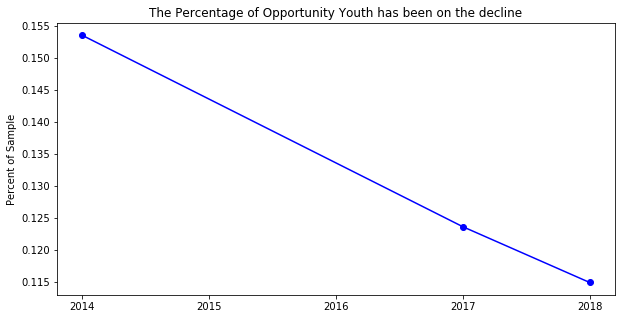

In [10]:
x_var = [2014, 2017, 2018]
y_var = [OY_prct_2014, OY_prct_2017, OY_prct_2018]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(x_var, y_var, marker='o', color='b');


# fig.savefig('percent_of_OY_youth.png')

In [11]:
variables = ['gender', 'education_attainment', 'disability_status', 'citizenship', 'english_language', 'parent_employment', 'marital_status', 'child_born_las_year', 'presence_of_children', 'moved', 'has_health_insurance']
status = ['female', 'No HS or GED', 'reported disability', 'Not US Citizen', 'Poor or No English language', 'One or both parents in labor force', 'married', 'yes', 'own child(ren)', 'moved here last year', 'no']
column_and_value_list = list(zip(variables, status))

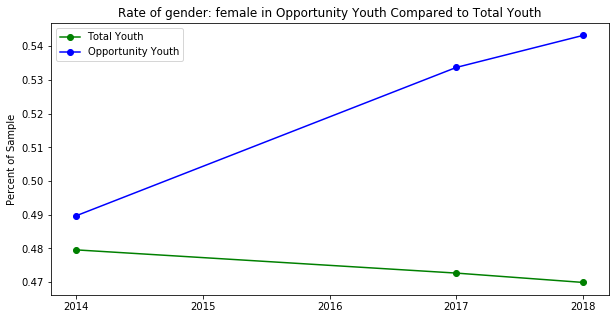

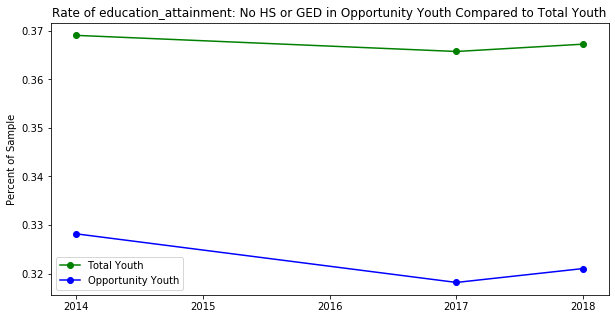

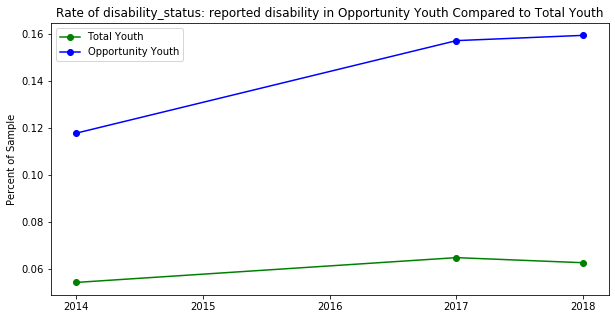

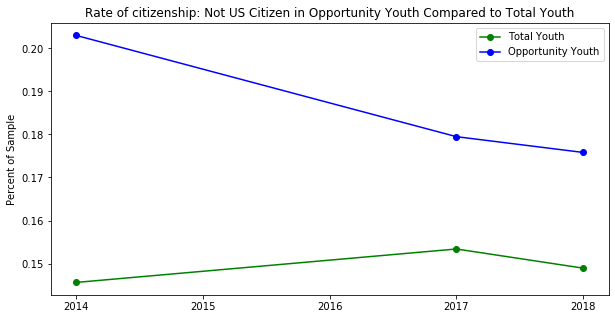

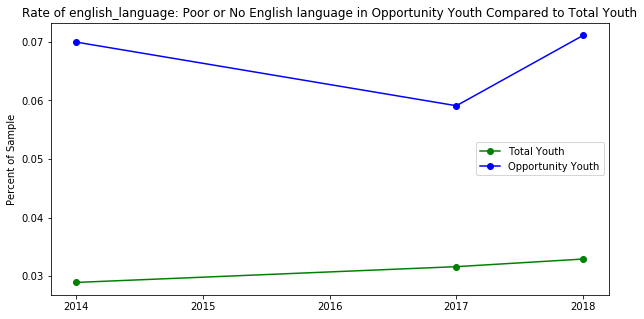

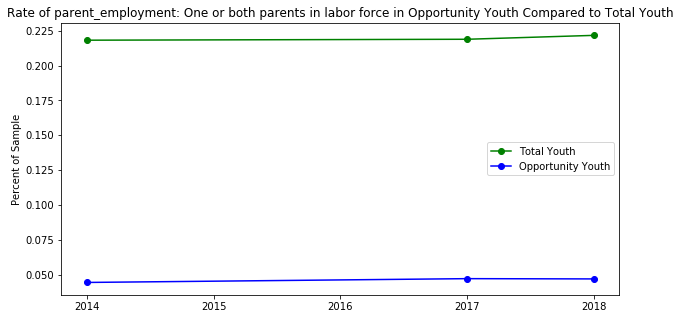

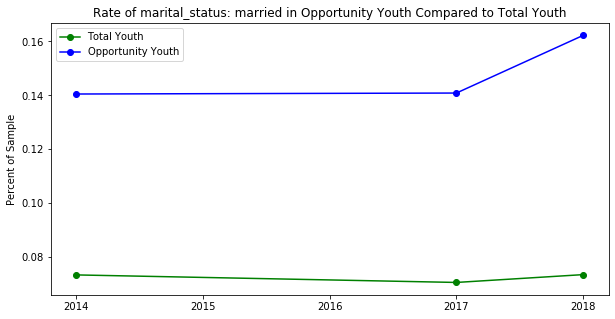

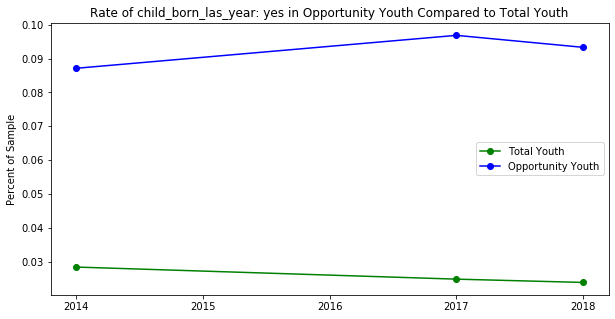

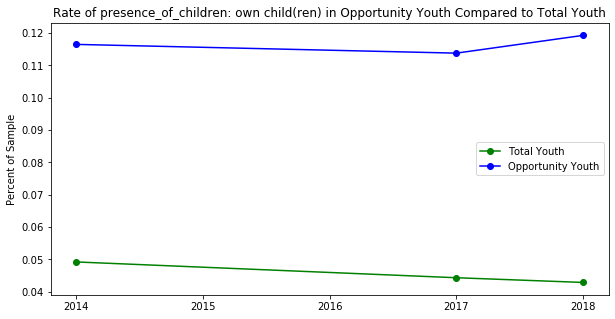

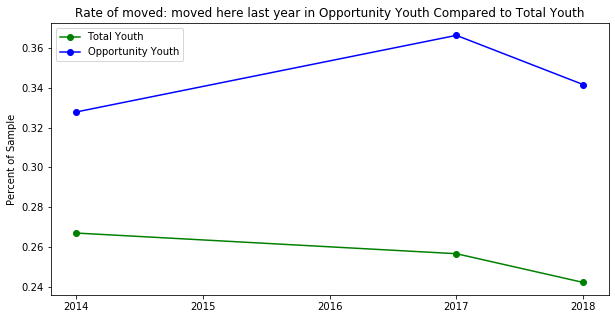

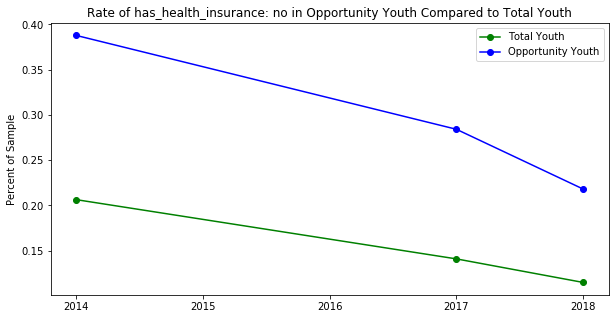

In [12]:
for column_and_value in column_and_value_list:
    src.line_across_years(column_and_value, SKC_youth_2014, SKC_youth_2017, SKC_youth_2018)

In [13]:
SKC_youth_2017[SKC_youth_2017['education_attainment'] == 'post HS education'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 0 to 3402
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   puma                                1283 non-null   object 
 1   rtrim                               1283 non-null   object 
 2   agep                                1283 non-null   float64
 3   gender                              1283 non-null   object 
 4   race_or_ethnicity                   1283 non-null   object 
 5   school                              1283 non-null   object 
 6   education_attainment                1283 non-null   object 
 7   employment_status                   1283 non-null   object 
 8   disability_status                   1283 non-null   object 
 9   disability_type                     1283 non-null   object 
 10  citizenship                         1283 non-null   object 
 11  english_language                    1283 no

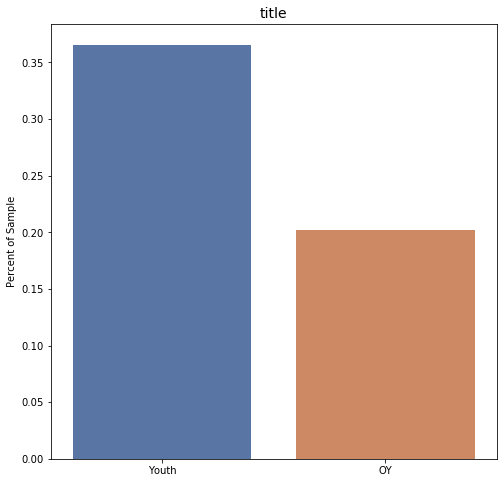

In [14]:
src.create_graph(('education_attainment', 'post HS education'), SKC_youth_2017, OY_df_2017, ['Youth', 'OY'])

In [15]:
SKC_youth_2017_f = SKC_youth_2017[SKC_youth_2017['gender'] == 'female']
OY_df_2017_f = OY_df_2017[OY_df_2017['gender'] == 'female']

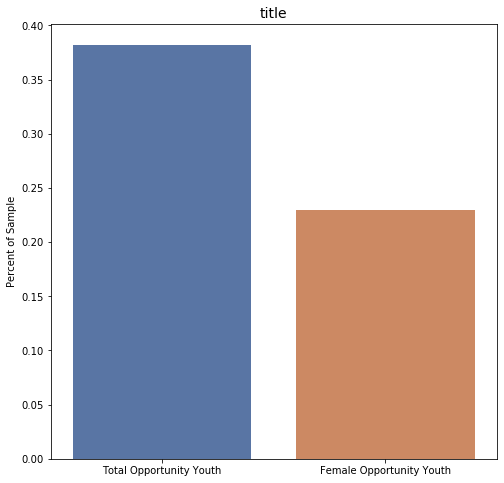

In [16]:
src.create_graph(('education_attainment', 'post HS education'), SKC_youth_2017_f, OY_df_2017_f, ['Total Opportunity Youth', 'Female Opportunity Youth'])

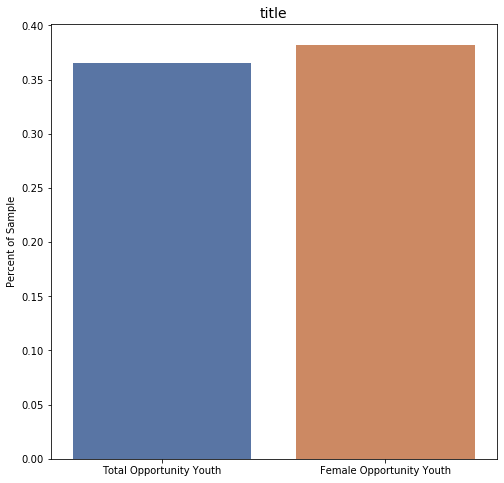

In [17]:
src.create_graph(('education_attainment', 'post HS education'), SKC_youth_2017, SKC_youth_2017_f, ['Total Opportunity Youth', 'Female Opportunity Youth'])

In [18]:
SKC_youth_2017_f_c = SKC_youth_2017_f[SKC_youth_2017_f['education_attainment'] == 'post HS education']
OY_df_2017_f_c = OY_df_2017_f[OY_df_2017_f['education_attainment'] == 'post HS education']

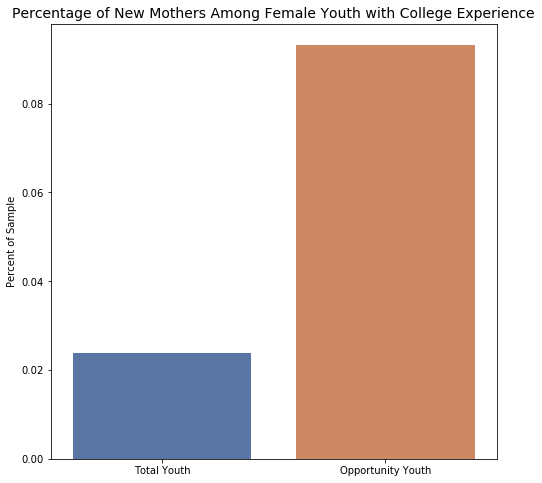

In [40]:
src.create_graph(('child_born_las_year', 'yes'), SKC_youth_2018, OY_df_2018, ['Total Youth', 'Opportunity Youth'], 'Percentage of New Mothers Among Female Youth with College Experience')

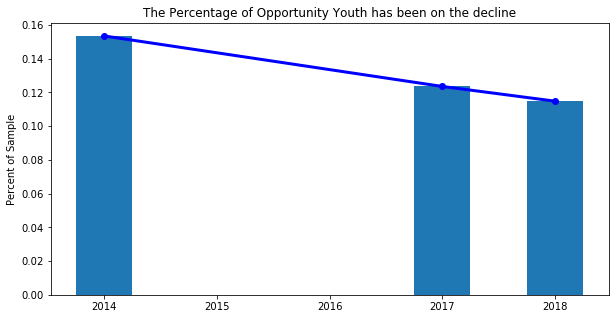

In [20]:
x_var = [2014, 2017, 2018]
y_var = [OY_prct_2014, OY_prct_2017, OY_prct_2018]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(x_var, y_var, marker='o', color='b', linewidth=3)
ax.bar(x_var, y_var, width = .5);


# fig.savefig('percent_of_OY_youth.png')

In [21]:
SKC_youth_2017_f = SKC_youth_2017[SKC_youth_2017['gender'] == 'female']
OY_df_2017_f = OY_df_2017[OY_df_2017['gender'] == 'female']

In [22]:
def calculate_gender_oy(gender, SKC, OY):
    total_skc = SKC[SKC['gender'] == gender].weight.sum()
    total_oy = OY[OY['gender'] == gender].weight.sum()
    return total_oy/total_skc

In [23]:
female_oy_rate_2014 = calculate_gender_oy('female', SKC_youth_2014, OY_df_2014)
female_oy_rate_2017 = calculate_gender_oy('female', SKC_youth_2017, OY_df_2017)
female_oy_rate_2018 = calculate_gender_oy('female', SKC_youth_2018, OY_df_2018)
female_OY_trend = [female_oy_rate_2014, female_oy_rate_2017, female_oy_rate_2018]

In [24]:
male_oy_rate_2014 = calculate_gender_oy('male', SKC_youth_2014, OY_df_2014)
male_oy_rate_2017 = calculate_gender_oy('male', SKC_youth_2017, OY_df_2017)
male_oy_rate_2018 = calculate_gender_oy('male', SKC_youth_2018, OY_df_2018)
male_OY_trend = [male_oy_rate_2014, male_oy_rate_2017, male_oy_rate_2018]
male_OY_trend

[0.15056507473569086, 0.10928322218787263, 0.09897248922770964]

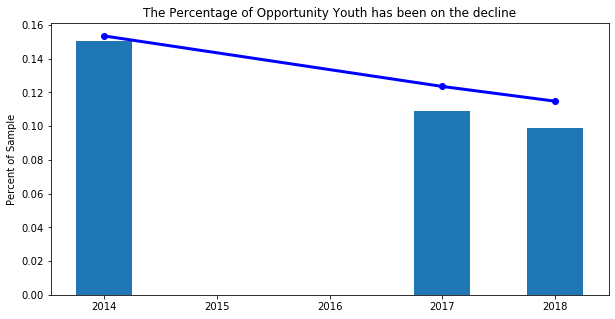

In [25]:
x_var = [2014, 2017, 2018]
y_var = [OY_prct_2014, OY_prct_2017, OY_prct_2018]

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(x_var, y_var, marker='o', color='b', linewidth=3)
ax.bar(x_var, male_OY_trend, width = .5);


# fig.savefig('percent_of_OY_youth.png')

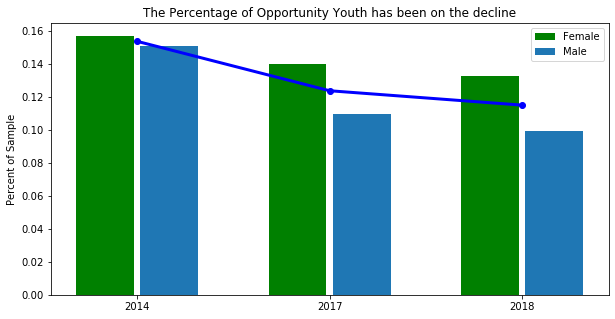

In [26]:
import numpy as np

x_var = [1,2,3]
y_var = [OY_prct_2014, OY_prct_2017, OY_prct_2018]
x = np.array(x_var)
width = .3

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

rects1 = ax.bar(x-(width/1.8), female_OY_trend, width, color='green', label='Female')
rects2 = ax.bar(x+(width/1.8), male_OY_trend, width, label='Male')
ax.set_xticklabels([2013,2014,2017,2018,2019,2020])
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(x_var, y_var, marker='o', color='b', linewidth=3)


fig.savefig('percent_of_OY_youth.png')

In [27]:
female_OY_compare = np.array([female_oy_rate_2014, female_oy_rate_2018])*100

male_OY_compare = np.array([male_oy_rate_2014, male_oy_rate_2018])*100

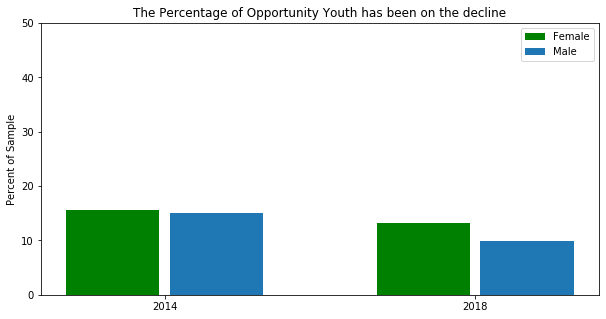

In [28]:
import numpy as np

x_var = [1,2]
y_var = np.array([OY_prct_2014, OY_prct_2018])*100
x = np.array(x_var)
width = .3

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')

rects1 = ax.bar(x-(width/1.8), female_OY_compare, width, color='green', label='Female')
rects2 = ax.bar(x+(width/1.8), male_OY_compare, width, label='Male')
ax.set_xticklabels([2013, 2014, 2018])
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0,50)

# ax.plot(x_var, y_var, marker='o', color='b', linewidth=3)


fig.savefig('percent_of_OY_youth.png')

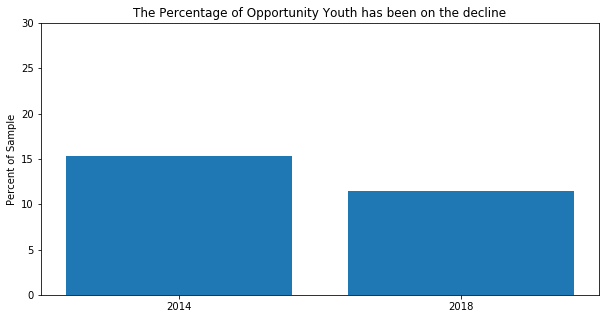

In [29]:
import numpy as np

x_var = [1,2]
y_var = np.array([OY_prct_2014, OY_prct_2018])*100
x = np.array(x_var)
width = .3

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title('The Percentage of Opportunity Youth has been on the decline')
ax.set_ylabel('Percent of Sample')
ax.set_xticklabels([2013, 2014, 2018])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0,30)

# rects1 = ax.bar(x-(width/1.8), female_OY_compare, width, color='green', label='Female')
# rects2 = ax.bar(x+(width/1.8), male_OY_compare, width, label='Male')
# ax.legend()


ax.bar(x_var, y_var)


fig.savefig('percent_of_OY_youth.png')

In [30]:
OY_prct_2018-OY_prct_2014

-0.038683161479419845

In [31]:
OY_df_2014.weight.sum()

8093.0

In [32]:
OY_df_2018.weight.sum()

9806.0

In [33]:
SKC_youth_2014.weight.sum()

52709.0

In [34]:
SKC_youth_2018.weight.sum()

85375.0

In [35]:
change_in_youth = SKC_youth_2018.weight.sum() - SKC_youth_2014.weight.sum()

prcnt_change_youth = change_in_youth / SKC_youth_2014.weight.sum()

prcnt_change_youth

0.6197423589899258

In [36]:
change_in_OY = OY_df_2018.weight.sum() - OY_df_2014.weight.sum()

prcnt_change_OY = change_in_OY / OY_df_2014.weight.sum()

prcnt_change_OY

0.2116644013344866

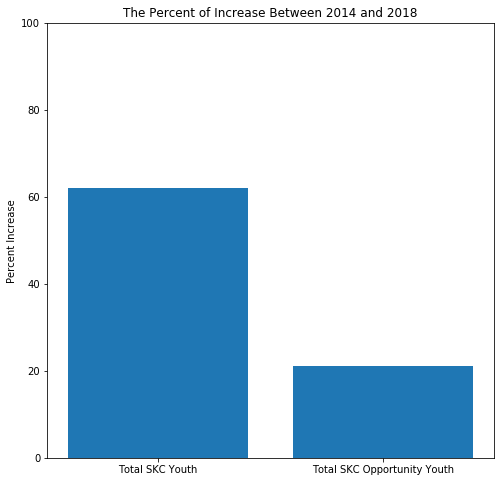

In [37]:
import numpy as np

x_var = ['Total SKC Youth', 'Total SKC Opportunity Youth']
y_var = np.array([prcnt_change_youth, prcnt_change_OY])*100
x = np.array(x_var)
width = .3

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('The Percent of Increase Between 2014 and 2018')
ax.set_ylabel('Percent Increase')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0,100)

# rects1 = ax.bar(x-(width/1.8), female_OY_compare, width, color='green', label='Female')
# rects2 = ax.bar(x+(width/1.8), male_OY_compare, width, label='Male')
# ax.legend()


ax.bar(x_var, y_var)


fig.savefig('prcnt_change.png')

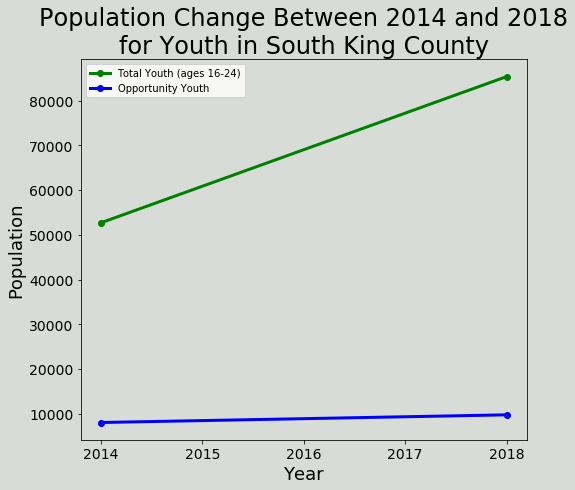

In [55]:
import numpy as np

fig, ax = plt.subplots(1,1, figsize=(8,7))

ax.set_title('Population Change Between 2014 and 2018\nfor Youth in South King County', fontsize=24)
ax.set_ylabel('Population', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(labelsize=14)
# rects1 = ax.bar(x-(width/1.8), female_OY_trend, width, color='green', label='Female')
# rects2 = ax.bar(x+(width/1.8), male_OY_trend, width, label='Male')
# ax.set_xticklabels([2013,2014,2017,2018,2019,2020])
# ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x_var = [2014,2018]
youth_y = [SKC_youth_2014.weight.sum(), SKC_youth_2018.weight.sum()]
ax.plot(x_var, youth_y, marker='o', color='g', linewidth=3, label='Total Youth (ages 16-24)')
OY_y = [OY_df_2014.weight.sum(), OY_df_2018.weight.sum()]
ax.plot(x_var, OY_y, marker='o', color='b', linewidth=3, label='Opportunity Youth')
ax.legend()
ax.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light grey')

fig.savefig('Total_pop_change.png')

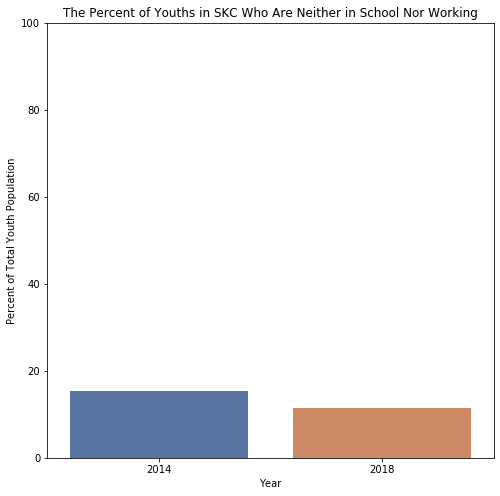

In [39]:
import numpy as np

x_var = ['2014', '2018']
y_var = np.array([OY_prct_2014, OY_prct_2018])*100
x = np.array(x_var)
width = .3

fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_title('The Percent of Youths in SKC Who Are Neither in School Nor Working')
ax.set_ylabel('Percent of Total Youth Population')
ax.set_xlabel('Year')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0,100)

# rects1 = ax.bar(x-(width/1.8), female_OY_compare, width, color='green', label='Female')
# rects2 = ax.bar(x+(width/1.8), male_OY_compare, width, label='Male')
# ax.legend()

sns.barplot(x=x_var, y=h, palette="deep", ax=ax1)
ax.bar(x_var, y_var)


fig.savefig('prcnt_change.png')

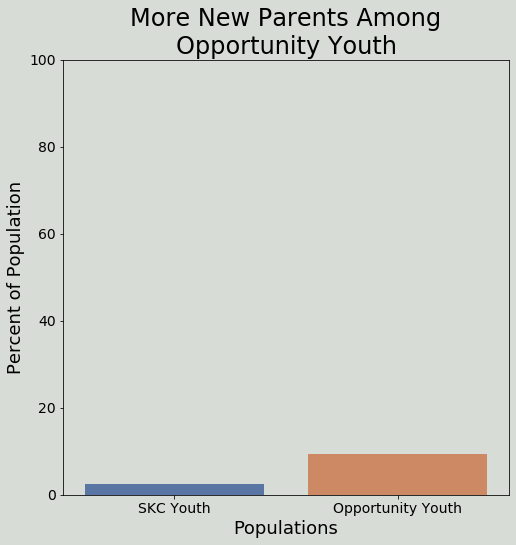

In [56]:
prct_tuple = src.compare(('child_born_las_year', 'yes'), SKC_youth_2018, OY_df_2018)
y_var = np.array(prct_tuple)*100
height_values = prct_tuple

fig, ax1 = plt.subplots(1,1, figsize=(8,8))
ax1.set_title('More New Parents Among\nOpportunity Youth', fontsize=24)
ax1.set_ylim(0,100)
ax1.set_ylabel('Percent of Population', fontsize=18)
ax1.set_xlabel('Populations', fontsize=18)
ax1.tick_params(labelsize=14)
sns.barplot(x=['SKC Youth', 'Opportunity Youth'], y=y_var, palette="deep", ax=ax1)
ax1.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light grey')
#     ax1.bar(x=col_names, height=height_values)
fig.savefig('new_parents.png')

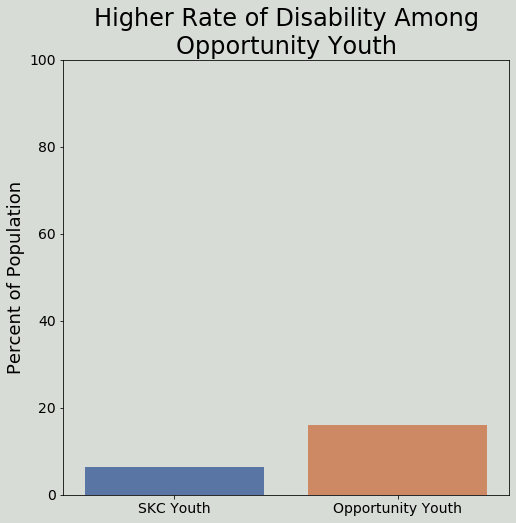

In [58]:
prct_tuple = src.compare(('child_born_las_year', 'yes'), SKC_youth_2018, OY_df_2018)
y_var = [6.297377, 15.939221]
height_values = prct_tuple

fig, ax1 = plt.subplots(1,1, figsize=(8,8))
ax1.set_title('Higher Rate of Disability Among\nOpportunity Youth', fontsize=24)
ax1.set_ylim(0,100)
ax1.set_ylabel('Percent of Population', fontsize=18)
ax1.tick_params(labelsize=14)
sns.barplot(x=['SKC Youth', 'Opportunity Youth'], y=y_var, palette="deep", ax=ax1)
ax1.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light grey')
#     ax1.bar(x=col_names, height=height_values)
fig.savefig('Disability.png')

In [59]:
OY_df_2018.english_language.unique()

prct_tuple = src.compare(('child_born_las_year', 'yes'), SKC_youth_2018, OY_df_2018)

array(['English Speaker', 'Poor or No English language'], dtype=object)

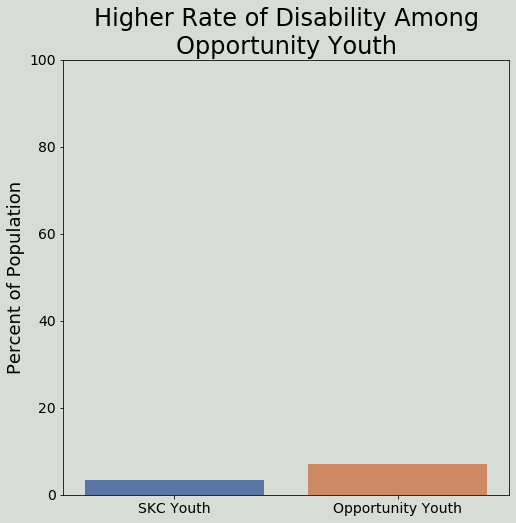

In [60]:
prct_tuple = src.compare(('english_language', 'Poor or No English language'), SKC_youth_2018, OY_df_2018)
y_var = np.array(prct_tuple)*100
height_values = prct_tuple

fig, ax1 = plt.subplots(1,1, figsize=(8,8))
ax1.set_title('Higher Rate of Disability Among\nOpportunity Youth', fontsize=24)
ax1.set_ylim(0,100)
ax1.set_ylabel('Percent of Population', fontsize=18)
ax1.tick_params(labelsize=14)
sns.barplot(x=['SKC Youth', 'Opportunity Youth'], y=y_var, palette="deep", ax=ax1)
ax1.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light grey')
#     ax1.bar(x=col_names, height=height_values)
fig.savefig('Disability.png')

src

In [61]:
src.compare(('english_language', 'Poor or No English language'), SKC_youth_2018, OY_df_2018)

(0.03292532942898975, 0.07107893126657149)